In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Indian_Kids_Screen_Time.csv')

In [3]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [5]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [6]:
df["Health_Impacts"].head()

0    Poor Sleep, Eye Strain
1                Poor Sleep
2                Poor Sleep
3                       NaN
4       Poor Sleep, Anxiety
Name: Health_Impacts, dtype: object

In [7]:
df["Health_Impacts"].isnull().sum()

np.int64(3218)

In [8]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [9]:
df.count()

Age                                  9712
Gender                               9712
Avg_Daily_Screen_Time_hr             9712
Primary_Device                       9712
Exceeded_Recommended_Limit           9712
Educational_to_Recreational_Ratio    9712
Health_Impacts                       6494
Urban_or_Rural                       9712
dtype: int64

In [10]:
df["Health_Impacts"]

0                Poor Sleep, Eye Strain
1                            Poor Sleep
2                            Poor Sleep
3                                   NaN
4                   Poor Sleep, Anxiety
                     ...               
9707                         Poor Sleep
9708                         Poor Sleep
9709    Poor Sleep, Eye Strain, Anxiety
9710                         Poor Sleep
9711                            Anxiety
Name: Health_Impacts, Length: 9712, dtype: object

In [11]:
df['Health_Impacts'] = df['Health_Impacts'].fillna('')
df['Health_Impacts'] = df['Health_Impacts'].apply(lambda x: 1 if 'Poor Sleep' in x else 0)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Model
from keras.layers import Input, Dense

In [13]:
label_enc = LabelEncoder()
for col in ['Gender', 'Primary_Device', 'Urban_or_Rural']:
    df[col] = label_enc.fit_transform(df[col])

In [14]:
features = [
    'Age',
    'Gender',
    'Primary_Device',
    'Exceeded_Recommended_Limit',
    'Educational_to_Recreational_Ratio',
    'Urban_or_Rural'
]
target = 'Health_Impacts'

In [15]:
X = df[features]
y = df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [19]:
param_distributions = {
    'GaussianNB': {},  # Naive Bayes doesn't have relevant hyperparameters for tuning in this context
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'LGBMClassifier': {
        'num_leaves': [31, 62, 127],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 200, 300]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9]
    },
    'LinearRegression': {},  # Linear Regression typically does not need hyperparameter tuning for most cases
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Instantiate models
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

best_params = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}")
    clf = RandomizedSearchCV(model, param_distributions[model_name], n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
    clf.fit(X_train_resampled, y_train_resampled)
    best_params[model_name] = clf.best_params_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Running RandomizedSearchCV for GaussianNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\ASUS\.conda\envs\CSE445Project\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for GaussianNB: {}
Running RandomizedSearchCV for DecisionTreeClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Running RandomizedSearchCV for RandomForestClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Running RandomizedSearchCV for AdaBoostClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\ASUS\.conda\envs\CSE445Project\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for AdaBoostClassifier: {'n_estimators': 50, 'learning_rate': 0.01}
Running RandomizedSearchCV for LGBMClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 3429, number of negative: 3429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 6858, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for LGBMClassifier: {'num_leaves': 31, 'n_estimators': 100, 'learning_rate': 0.01}
Running RandomizedSearchCV for XGBClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBClassifier: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Running Rand

C:\Users\ASUS\.conda\envs\CSE445Project\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for LinearRegression: {}
Running RandomizedSearchCV for LogisticRegression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for LogisticRegression: {'solver': 'lbfgs', 'C': np.float64(0.08858667904100823)}
Running RandomizedSearchCV for SVC
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\ASUS\.conda\envs\CSE445Project\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVC: {'kernel': 'linear', 'C': 0.1}
Running RandomizedSearchCV for KNeighborsClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNeighborsClassifier: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     1.0000    0.2996    0.4611      1415
           1     0.6020    1.0000    0.7516      1499

    accuracy                         0.6599      2914
   macro avg     0.8010    0.6498    0.6063      2914
weighted avg     0.7953    0.6599    0.6105      2914



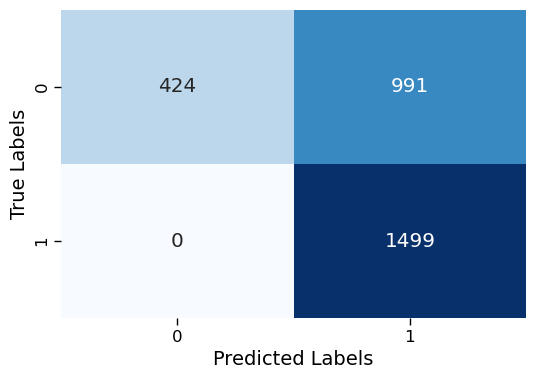

ROC-AUC Score for Hard Voting: 0.6498


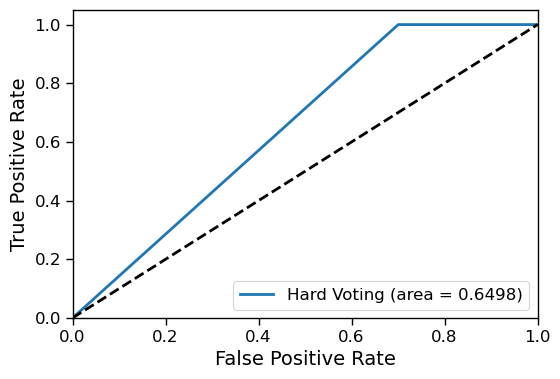


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     1.0000    0.2996    0.4611      1415
           1     0.6020    1.0000    0.7516      1499

    accuracy                         0.6599      2914
   macro avg     0.8010    0.6498    0.6063      2914
weighted avg     0.7953    0.6599    0.6105      2914



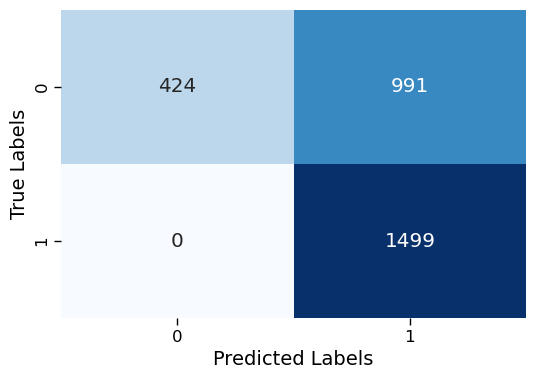

ROC-AUC Score for Soft Voting: 0.6760


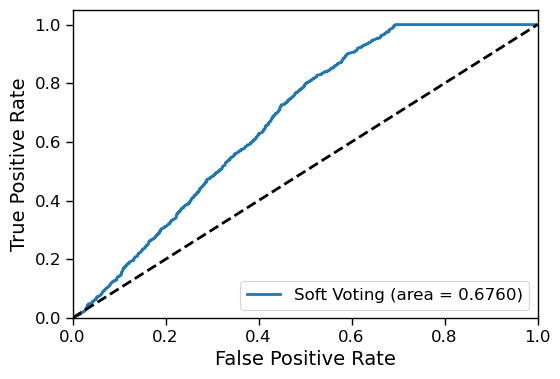

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train_resampled, y_train_resampled)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0     1.0000    0.2996    0.4611      1415
           1     0.6020    1.0000    0.7516      1499

    accuracy                         0.6599      2914
   macro avg     0.8010    0.6498    0.6063      2914
weighted avg     0.7953    0.6599    0.6105      2914



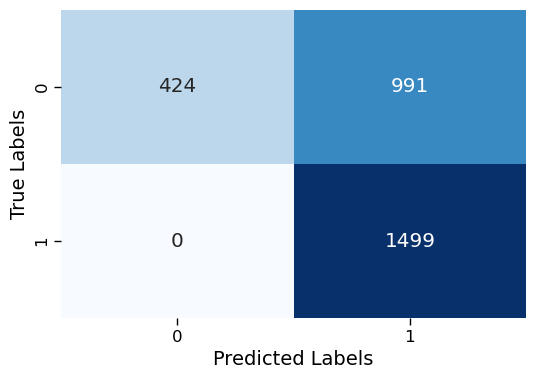

ROC-AUC Score for GaussianNB: 0.6778


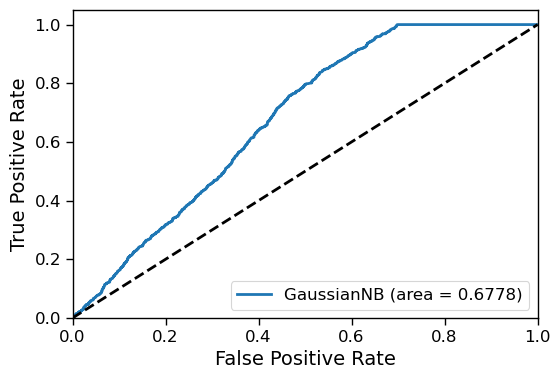

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0     0.6580    0.4855    0.5588      1415
           1     0.6107    0.7618    0.6779      1499

    accuracy                         0.6277      2914
   macro avg     0.6344    0.6237    0.6184      2914
weighted avg     0.6337    0.6277    0.6201      2914



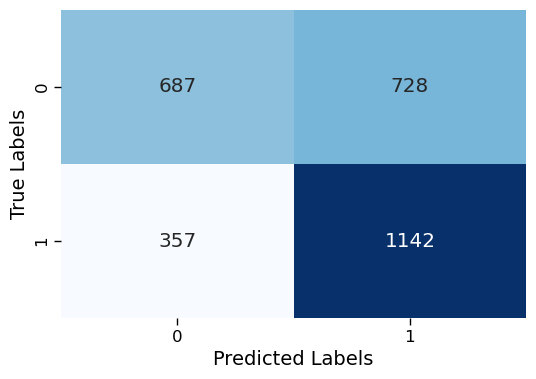

ROC-AUC Score for DecisionTreeClassifier: 0.6547


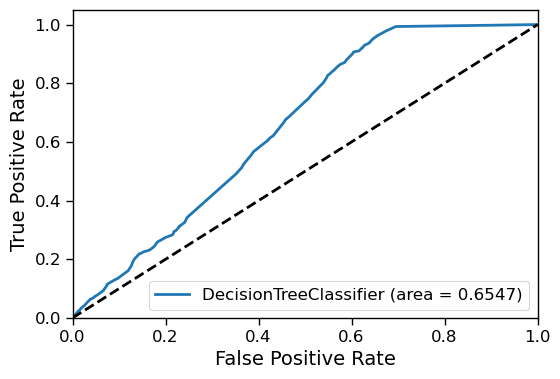

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0     0.7426    0.4099    0.5282      1415
           1     0.6085    0.8659    0.7148      1499

    accuracy                         0.6445      2914
   macro avg     0.6756    0.6379    0.6215      2914
weighted avg     0.6737    0.6445    0.6242      2914



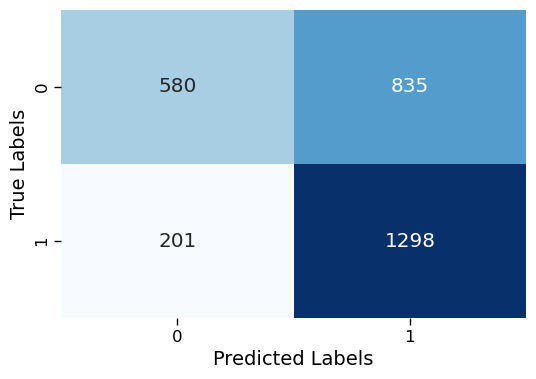

ROC-AUC Score for RandomForestClassifier: 0.6469


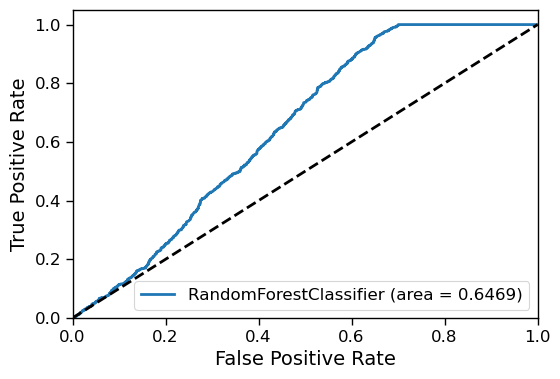

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0     1.0000    0.2996    0.4611      1415
           1     0.6020    1.0000    0.7516      1499

    accuracy                         0.6599      2914
   macro avg     0.8010    0.6498    0.6063      2914
weighted avg     0.7953    0.6599    0.6105      2914



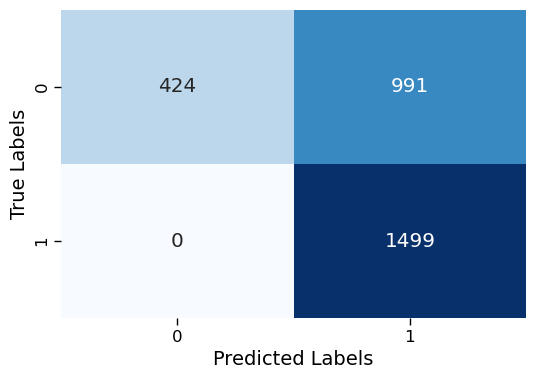

ROC-AUC Score for AdaBoostClassifier: 0.6498


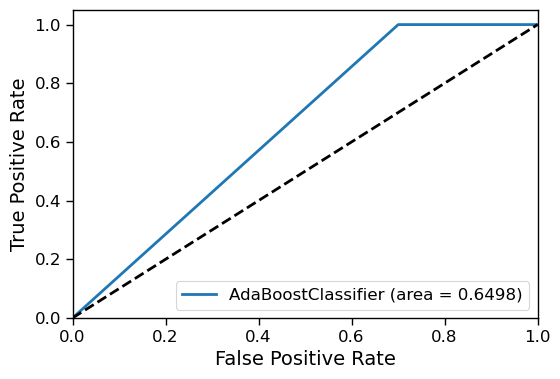

[LightGBM] [Info] Number of positive: 3429, number of negative: 3429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 6858, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report for LGBMClassifier:
              precision    recall  f1-score   support

           0     0.8044    0.3894    0.5248      1415
           1     0.6124    0.9106    0.7323      1499

    accuracy                         0.6575      2914
   macro avg     0.7084    0.6500    0.6285      2914
weighted avg     0.7056    0.6575    0.6315      2914



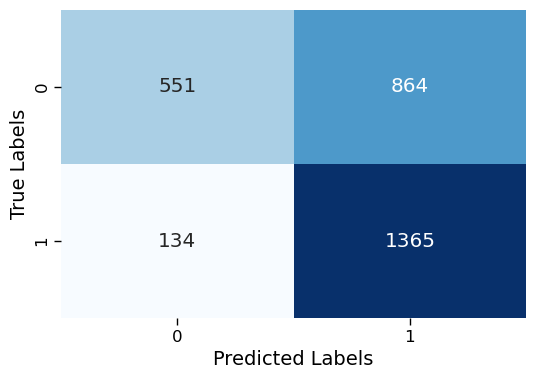

ROC-AUC Score for LGBMClassifier: 0.6588


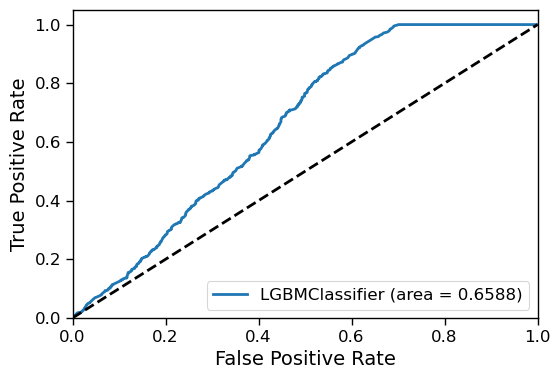

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0     0.8328    0.3661    0.5086      1415
           1     0.6086    0.9306    0.7360      1499

    accuracy                         0.6565      2914
   macro avg     0.7207    0.6483    0.6223      2914
weighted avg     0.7175    0.6565    0.6255      2914



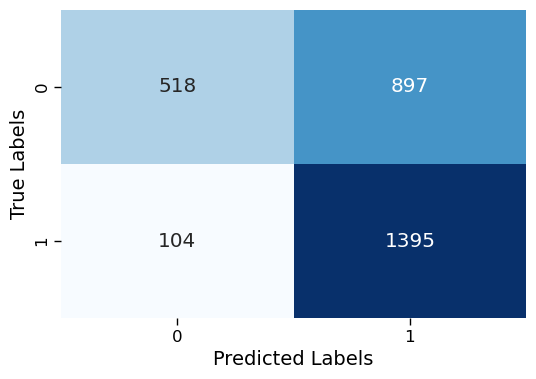

ROC-AUC Score for XGBClassifier: 0.6662


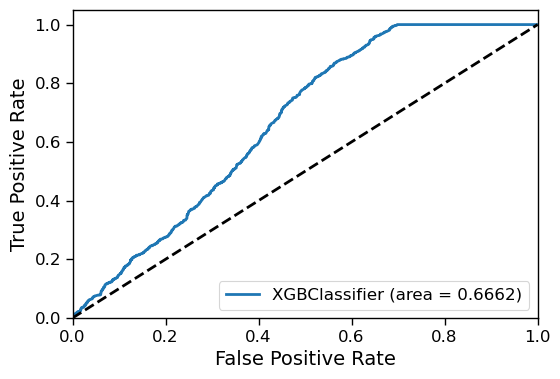

Classification Report for LinearRegression:
              precision    recall  f1-score   support

           0     1.0000    0.2996    0.4611      1415
           1     0.6020    1.0000    0.7516      1499

    accuracy                         0.6599      2914
   macro avg     0.8010    0.6498    0.6063      2914
weighted avg     0.7953    0.6599    0.6105      2914



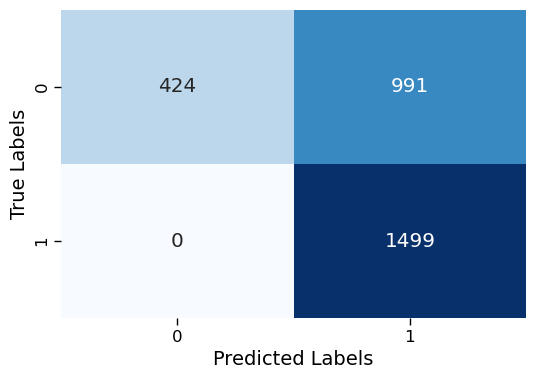

ROC-AUC Score for LinearRegression: 0.6759


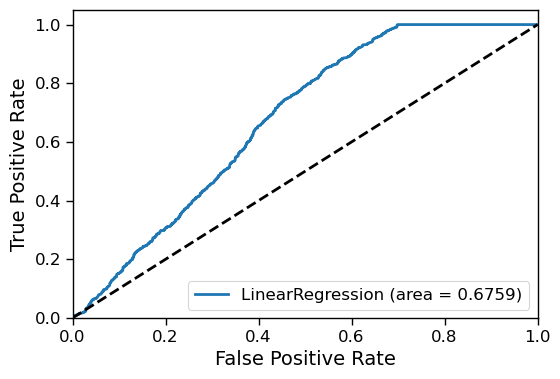

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0     1.0000    0.2996    0.4611      1415
           1     0.6020    1.0000    0.7516      1499

    accuracy                         0.6599      2914
   macro avg     0.8010    0.6498    0.6063      2914
weighted avg     0.7953    0.6599    0.6105      2914



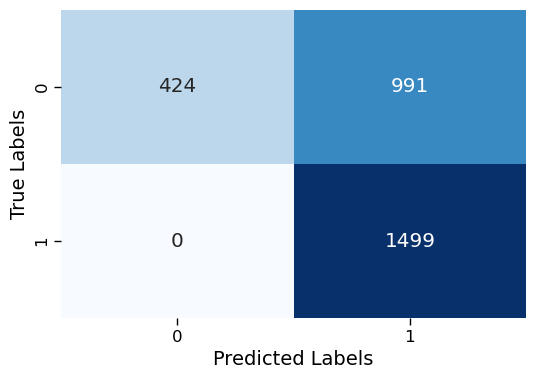

ROC-AUC Score for LogisticRegression: 0.6762


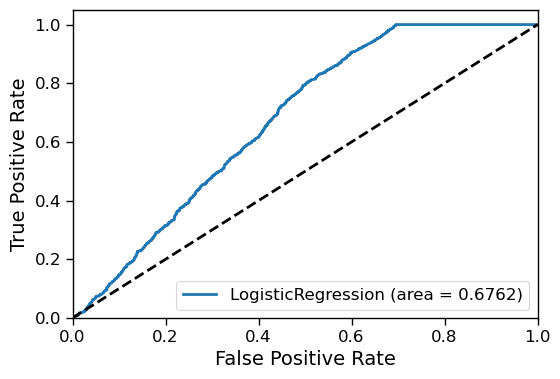

Classification Report for SVC:
              precision    recall  f1-score   support

           0     1.0000    0.2996    0.4611      1415
           1     0.6020    1.0000    0.7516      1499

    accuracy                         0.6599      2914
   macro avg     0.8010    0.6498    0.6063      2914
weighted avg     0.7953    0.6599    0.6105      2914



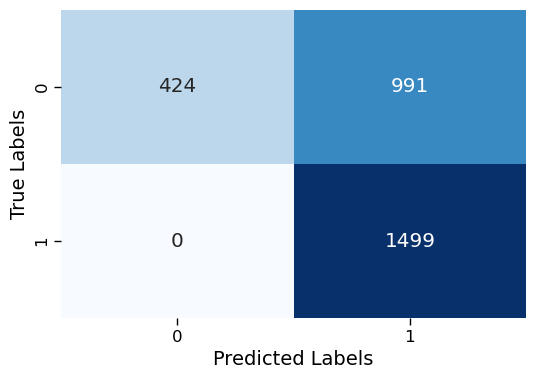

ROC-AUC Score for SVC: 0.6318


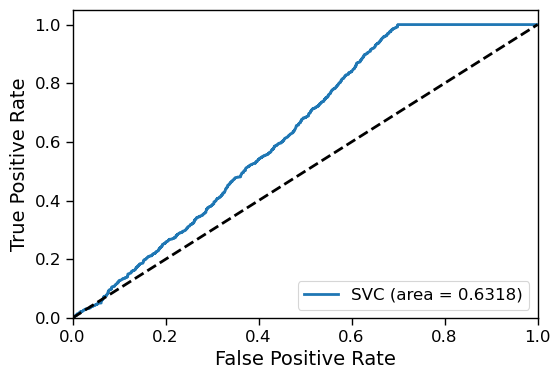

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0     0.6135    0.5004    0.5512      1415
           1     0.5983    0.7025    0.6462      1499

    accuracy                         0.6043      2914
   macro avg     0.6059    0.6014    0.5987      2914
weighted avg     0.6057    0.6043    0.6001      2914



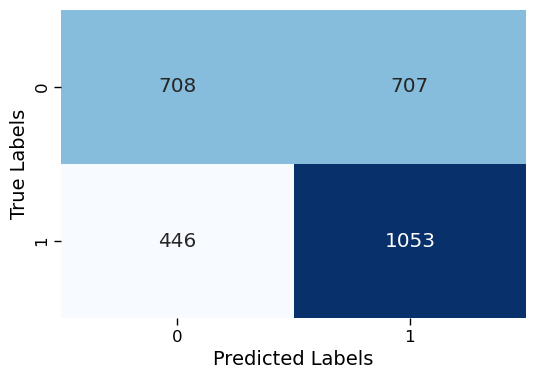

ROC-AUC Score for KNeighborsClassifier: 0.6371


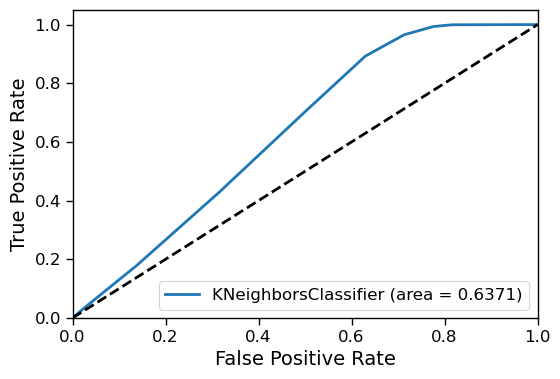

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():
    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    optimized_model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred = optimized_model.predict(X_test)

    # For LinearRegression, convert predictions to binary using a threshold
    if model_name == 'LinearRegression':
        y_pred_binary = (y_pred > 0.5).astype(int)
        y_proba = y_pred  # Use predictions as probabilities
    else:
        # For other models that support predict_proba, use it to calculate ROC-AUC
        if hasattr(optimized_model, "predict_proba"):
            y_proba = optimized_model.predict_proba(X_test)[:, 1]
        elif hasattr(optimized_model, "decision_function"):
            y_proba = optimized_model.decision_function(X_test)
        else:
            y_proba = y_pred  # If neither method is available, fall back to predictions
        y_pred_binary = y_pred

    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred_binary, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {model_name}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {model_name}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [22]:
input_data = {
    'Age': 8,
    'Gender': 1,  # Female
    'Avg_Daily_Screen_Time_hr': 8.5,
    'Primary_Device': 4,  # Smartphone 
    'Exceeded_Recommended_Limit': 1,
    'Educational_to_Recreational_Ratio': 0.33,
    'Urban_or_Rural': 1  # Urban
}

# Turn the dict into a dataframe
input_df = pd.DataFrame([input_data])

# Make prediction
pred = voting_clf_soft.predict(input_df)[0]
prob = voting_clf_soft.predict_proba(input_df)[0][1]

# Display output
print("Prediction:", "Poor Sleep" if pred == 1 else "No Poor Sleep")
print(f"Confidence: {prob * 100:.2f}%")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Avg_Daily_Screen_Time_hr
